In [366]:
import pandas as pd
import matplotlib.pyplot as plt
import re
fb = pd.read_csv('nysu_10902_2019_research_right.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

In [367]:
#政見 有哪些立委
politics['姓名'].unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [368]:
#fb 總共有哪些立委
fb['page_name'].unique()

array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘'], dtype=object)

In [369]:
liu = fb[fb.page_name == "愛信任-劉世芳"]
# 把時間格式轉換
liu['new_date'] = pd.to_datetime(liu['created_time_taipei']).dt.date
liu['post_hour'] = pd.to_datetime(liu['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
liu['month_year'] = pd.to_datetime(liu['new_date']).dt.to_period('M')
liu.head(1)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
21640,879078268822395_2259877347409140,879078268822395,愛信任-劉世芳,政治人物,最近的「加辣事件」大家應該對家暴很有感⋯\n\n保護孩子，我時常提醒身邊朋友，遇到疑似家暴行為，#雞婆一點，或許你救了他一命、幫助他們的家庭納入社會安全網。\n\n#113 #113 #113家暴通報專線\n➡️衛福部說明：https://goo.gl/rzL62g\n#老人保護\n#身心障礙者保護\n#性騷擾事件通報,NaN,photo,https://www.facebook.com/879078268822395/posts/2259877347409140/,2019-01-15T00:02:54+0000,2019-01-15T08:02:54,...,0,0,0,0,0,46,4,2019-01-15,8,2019-01


In [375]:
#發文時間分佈
post_time = liu[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,0,2
1,1,2
2,6,1
3,7,5
4,8,27
5,9,25
6,10,26
7,11,24
8,12,20
9,13,21


/usr/lib64/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib64/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib64/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


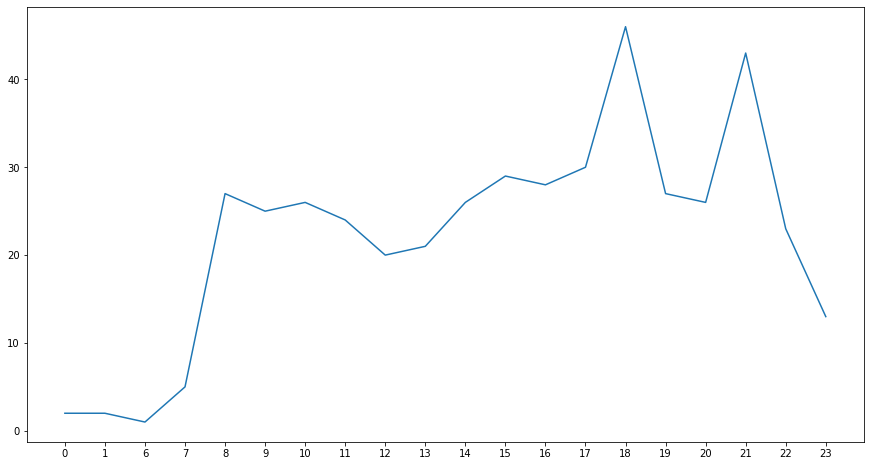

In [377]:
#畫出整年貼文分佈
labels = post_time['post_hour'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, post_time['post_id'])

plt.show()

In [378]:
#整年貼文數量分佈
whole_year = liu[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

,month_year,post_id
0,2019-01,33
1,2019-02,28
2,2019-03,35
3,2019-04,32
4,2019-05,23
5,2019-06,25
6,2019-07,26
7,2019-08,32
8,2019-09,40
9,2019-10,51


In [336]:
#每個月平均發文數量統計值
whole_year.describe()

,post_id
count,12.000000
mean,37.000000
std,18.620614
min,23.000000
25%,27.500000
50%,32.000000
75%,36.250000
max,91.000000


/usr/lib64/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib64/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib64/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


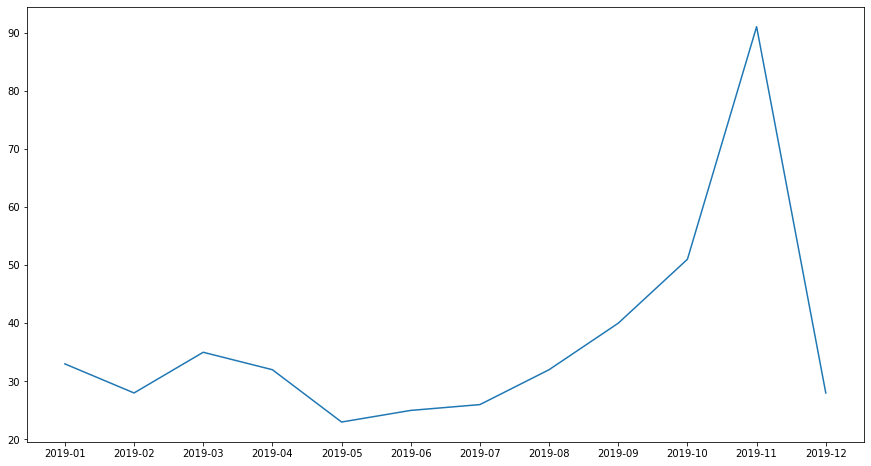

In [337]:
#畫出整年貼文分佈
labels = results['newhead'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, whole_year['post_id'])

plt.show()

In [ ]:
# 每個月的按讚、評論、分享總數 分佈
results = liu.groupby('month_year').sum()
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

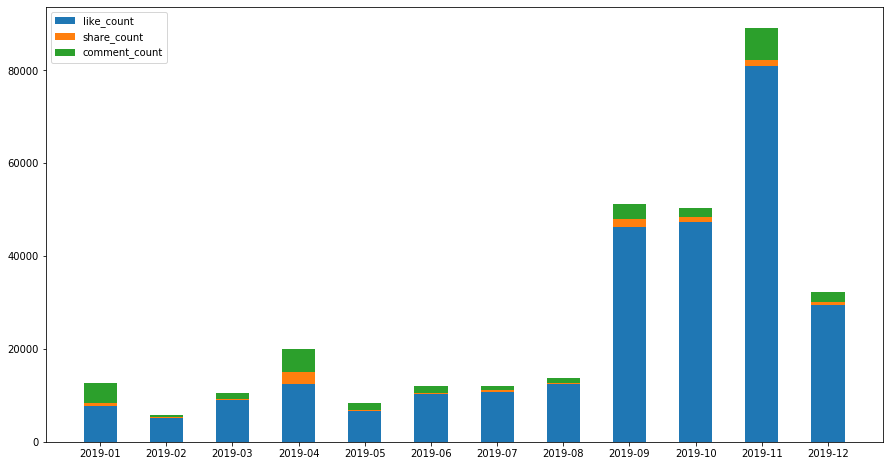

In [338]:
#整年按讚、評論、分享數

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])
#ax.plot(labels, whole_year['post_id'])

ax.legend()
plt.show()

In [339]:
# 很明顯11月按讚、分享、評論數很高，因此找出11月的資料
highest = liu[liu.month_year == "2019-11"]
results_high = highest.groupby('new_date').sum()
results_high.index.name = 'newhead' #更改欄位名稱
results_high.reset_index(inplace=True)
results_high

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_time
0,2019-11-01,879078268822395,597,0,0,0,0,0,26,4,0
1,2019-11-02,3516313075289580,7188,0,0,0,0,0,742,196,59
2,2019-11-03,2637234806467185,2870,0,0,0,0,0,139,47,51
3,2019-11-04,3516313075289580,3809,0,0,0,0,0,94,54,58
4,2019-11-05,2637234806467185,2060,0,0,0,0,0,73,30,39
5,2019-11-06,2637234806467185,2229,0,0,0,0,0,200,52,40
6,2019-11-07,4395391344111975,4545,0,0,0,0,0,196,49,70
7,2019-11-08,3516313075289580,2334,0,0,0,0,0,52,16,57
8,2019-11-09,1758156537644790,2234,0,0,0,0,0,106,50,34
9,2019-11-10,2637234806467185,2398,0,0,0,0,0,88,16,57


/usr/lib64/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib64/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
No handles with labels found to put in legend.


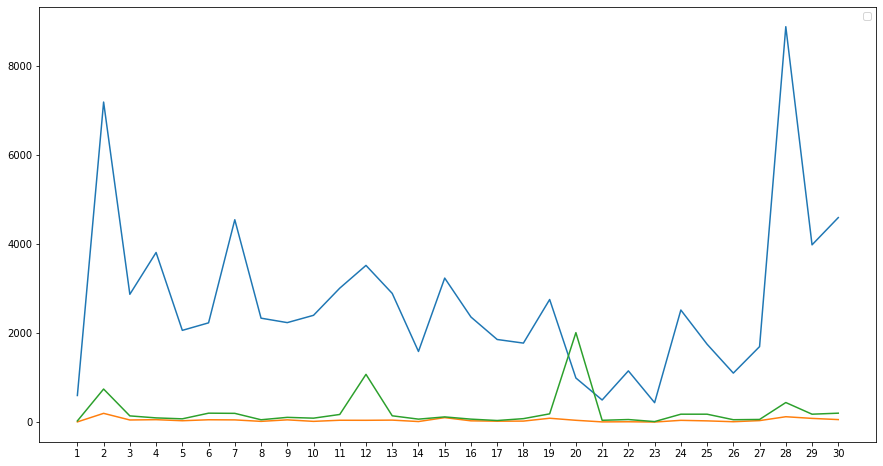

In [340]:
#畫圖 看整個月按讚、分享、評論的流量
labels = [str(i) for i in range(1,len(results_high)+1)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_high['like_count'])
ax.plot(labels, results_high['share_count'])
ax.plot(labels, results_high['comment_count'])

ax.legend()

plt.show()

In [355]:
#11/20 號很明顯評論量很高 甚至高於讚數 因此找出這天的文章
liu['new_date']=liu['new_date'].map(str) # turn 'new_date' into str
Nov_20 = liu[liu['new_date'] == "2019-11-20"]
Nov_20[['message','comment_count']].replace(r'\n', ' ', regex = True)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,message,comment_count
22013,「驚世夫妻」？還是「金墅夫妻」？ 韓國瑜市長，你不是草包！ 你跟你的夫人李佳芬已經從「驚世夫妻」變成「金墅夫妻」！ 今天週刊又爆料了，怎麼辦呢？從南港、內湖、板橋，現在在臺北市又有精華地段的大安區仁愛路的樓中樓，真是不簡單！你從來沒有吃過我們左營的誠實豆沙包！ 韓國瑜市長，你到底隱匿多少財產呢？你的夫人閨密高美蘭主任秘書，現在也跟你一樣落跑了！？她的財產也申報不實你知道嗎？所以還是呼籲韓國瑜市長趕快吃誠實豆沙包！因為你圓了一次謊，覺得很爽。但是你忘了，後面要用九千九百九十個謊才能圓的回來！韓國瑜市長趕快來吃誠實豆沙包！,84
22014,【到底，還有多少房子？】 中國國民黨推出的總統候選人韓國瑜，除了前兩週沸沸揚揚的豪宅案，今天早上‘’又‘’被週刊爆出坐擁大安區樓中樓豪宅一棟。上週還為拯救選情，請出競選辦公室召開記者會澄清房產一事。會中，國民黨為轉移焦點，硬扯國家機器介入，但當場卻反被週刊記者打臉。競辦救援沒有成功，反而成功激怒民眾對於中國國民黨硬凹護航的行為不滿。 看來韓國瑜和李佳芬不只是 #驚世夫妻，更是 #金墅夫妻， #賺的是房市、 #想的是房事。連趙東洲高美蘭這對閨蜜也一樣！ 想必壹周刊在選前，每週都備好猛料在等他，這下我們終於知道為何 #高美蘭 要請長假，韓國瑜今天又為什麼沒有公開行程了……… 但我要奉勸韓國瑜，要圓這個謊、就得說更多個謊，且真理是越辯越明。雖然你可以逃避一時爽，但不可能一直逃避一直爽。很多事情不是不報，而是時候未到！ 〈獨家調查1〉大安區也有房？韓國瑜仁愛路樓中樓住處曝光 https://tw.nextmgz.com/realtimenews/news/484098 〈獨家調查2〉貸韓國瑜1400萬 台肥內部調查李復興恐涉背信 https://tw.nextmgz.com/realtimenews/news/484100 〈獨家調查3〉趙東洲喬無雙千萬違約金 打韓國瑜名號求助蔣萬安 https://tw.nextmgz.com/realtimenews/news/484102 〈獨家調查4〉韓冰長輩加拿大贈房 神祕地下室藏節稅玄機 https://tw.nextmgz.com/realtimenews/news/484104,1925


11/20收到異常多的評論，理論上按讚數應該很高、但是按讚數反而很低，推測是發表很有爭議性問題
因此去找出評論數最多的貼文 (我們預期多數文章都是比較有鼓動選民情緒的文章)

In [342]:
#找出評論數量的統計值
liu['comment_count'].describe()

count     444.000000
mean       69.031532
std       231.021275
min         2.000000
25%        15.000000
50%        30.000000
75%        55.250000
max      3562.000000
Name: comment_count, dtype: float64

In [356]:
#從列出評論數（互動數）最高的一天
comment_top20 = liu.sort_values('comment_count',ascending=False).head(10)
comment_top20 = comment_top20[['message','comment_count']]
comment_top20 = comment_top20.replace(r'\n',' ',regex=True) # message text preprocessing
comment_top20

,message,comment_count
21750,這是 #台灣高雄 的九如/澄清路口，高雄市政府要不要出來說明一下？ 今天不是愚人節了吧？ 也請有看到非繁體標誌的台灣高雄鄉親們，將資訊跟世芳分享 https://line.me/R/ti/p/%40abc8900g,3562
21649,期待陸官討論校歌的「黨旗飛舞」，我已經連三年提案要求。這不是「逼」，而是「堅持軍隊屬於國家」。 它是一個很冷門預算，關心的人不多，然而每年也不意外地，總是會在提案「公開」審查前就收獲個別媒體上極大的反撲力道。 但我為什麼還是堅持國防部應當重視此事？ 民主化歷程以來，軍隊已經國家化，黨旗終究非國旗，無奈陸官校歌仍堅持「黨旗飛舞」。因此，我基於民主理念、軍隊國家化的原則，要求陸軍官校校務會議，按大學自治精神討論，畢竟不同年代的陸官校友想法或有不同。 例如政治大學，校歌就經校內民主程序與校務會議，自決將「實行三民主義為吾黨的使命」，修正為「實踐民主法治是我們的使命」，並採新舊歌詞並陳。 有為者亦若是，政大可以，陸官也可以！,2365
22014,【到底，還有多少房子？】 中國國民黨推出的總統候選人韓國瑜，除了前兩週沸沸揚揚的豪宅案，今天早上‘’又‘’被週刊爆出坐擁大安區樓中樓豪宅一棟。上週還為拯救選情，請出競選辦公室召開記者會澄清房產一事。會中，國民黨為轉移焦點，硬扯國家機器介入，但當場卻反被週刊記者打臉。競辦救援沒有成功，反而成功激怒民眾對於中國國民黨硬凹護航的行為不滿。 看來韓國瑜和李佳芬不只是 #驚世夫妻，更是 #金墅夫妻， #賺的是房市、 #想的是房事。連趙東洲高美蘭這對閨蜜也一樣！ 想必壹周刊在選前，每週都備好猛料在等他，這下我們終於知道為何 #高美蘭 要請長假，韓國瑜今天又為什麼沒有公開行程了……… 但我要奉勸韓國瑜，要圓這個謊、就得說更多個謊，且真理是越辯越明。雖然你可以逃避一時爽，但不可能一直逃避一直爽。很多事情不是不報，而是時候未到！ 〈獨家調查1〉大安區也有房？韓國瑜仁愛路樓中樓住處曝光 https://tw.nextmgz.com/realtimenews/news/484098 〈獨家調查2〉貸韓國瑜1400萬 台肥內部調查李復興恐涉背信 https://tw.nextmgz.com/realtimenews/news/484100 〈獨家調查3〉趙東洲喬無雙千萬違約金 打韓國瑜名號求助蔣萬安 https://tw.nextmgz.com/realtimenews/news/484102 〈獨家調查4〉韓冰長輩加拿大贈房 神祕地下室藏節稅玄機 https://tw.nextmgz.com/realtimenews/news/484104,1925
22040,韓國瑜帶頭，三人成虎在全台各地教壞囝仔大小 劉世芳：大力譴責韓國瑜、要求黃昭順表態！,1013
21880,北柯南瑜 天下無（） #以下開放大家填字,395
22060,誠摯跟館長道歉， 聽到館長真真切切的發言， 館長真心為了台灣付出了許多， 更因為要支持台灣犧牲了這麼多。 館長，對不起，委屈你了！！ 館長不是你錯了，是韓國瑜騙了大家！ 讓館長難過了，真的非常抱歉。 館長的努力，大家都看得到， 館長我們支持你，就像你支持我們一樣。,380
21815,登革熱防治，全市大作戰！ 防疫人員超辛苦，大家一起來！ 世芳想跟大家說，防治登革熱，中央不曾阻擋過一分一毫。 我提醒韓市長，必要時，市府第二預備金可以動用，這是防災救急用的經費，隨時可依規定動用！ 最重要的是第一線防治人員，包含鄰里長、社區幹部、衛生局、環保局、水利局同仁，甚至國軍化學兵，都是非常非常盡責認真，堪稱是全國最強防疫團隊！ 辛苦的防疫同仁，大家加油！,372
21984,星空藝文季~左楠歌喉讚 世芳邀您一起做伙來聽歌~,369
21828,［廣德家］來囉,350
22051,總統 蔡英文 Tsai Ing-wen 、立法委員劉世芳左營聯合競選總部成立大會，歡迎大家到現場為台灣加油!,333


In [344]:
# 比較、查看他政見
promise = politics[politics.姓名 == "劉 世 芳"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['62    一、盡速通過「不當黨產處置條例」，建立政黨公平競爭機制',
 '二、推動國防自主產業，整合產官學研合作，提升台灣自主防衛能量',
 '三、廣設社區關懷據點，結合居家服務及長期照護，建構政府、社區、家庭聯合照顧網絡，實踐「在地老化」的 老吾老政策',
 '四、打通左楠十字動脈',
 ' 1、打造左營三鐵共構園區為南方新門戶',
 '2、延續聚落文化景觀，重新檢討眷改政策，中央與地方共同參與眷村活化及保存',
 '3、盡速開闢「新台17線」，發揮聯外道路功能',
 '4、加快「鼎力交流道國10接國1北上高架路段」開闢，改善東西向交通瓶頸',
 '5、強化國訓中心與世運主場館功能，結合觀光產業，推動運動休閒園區',
 '五、推動產業轉型升級，追求環境永續發展',
 ' 1、中油五輕廠區，朝向生產、生活、生態的「三生新綠園」規劃發展',
 ' （1）推動「綠經濟科技園區」，引入綠能、環保等產業，帶動高雄產業轉型',
 '（2）啟動國營事業宿舍都更計畫，建置「安居樂業宅」，安置原居住員工，融入新移入人口',
 '（3）盡速進行污染區的整治，朝「生態公園」規劃',
 '2、持續推動楠梓加工區產業升級，形成高科技產業聚落，創造就業機會',
 '3、推動中油總部南遷，落實管線安全管理，實現財稅正義。']

In [ ]:
評論數最高的和他的政見有什麼對應 ???(韓國瑜的豪宅案可以對照第一條政見）  (軍隊黨旗可以對應國防自主產業）

評論、分享都是和選民的'互動性'，因此查看分享數最高的貼文內容

In [362]:
# 整年 貼文分享數最高 
share_top10 = liu.sort_values('share_count',ascending=False).head(10)
share_top10 = share_top10[['message','share_count']]
share_top10 = share_top10.replace(r'\n',' ',regex=True) # message text preprocessing
share_top10

,message,share_count
21750,這是 #台灣高雄 的九如/澄清路口，高雄市政府要不要出來說明一下？ 今天不是愚人節了吧？ 也請有看到非繁體標誌的台灣高雄鄉親們，將資訊跟世芳分享 https://line.me/R/ti/p/%40abc8900g,2382
21921,看到黄委員回應她参加一國兩制研究會岀席只是禮貌性致詞，還宣稱在大家的努力下一國兩制會帶給兩岸漂亮的成績，但重點不是致詞，而是妳會保護台灣不被＂侵門踏户＂嗎? 九二共識一向是國民黨的一貫立場，但中國早不認九二共識，更可笑的是中國習近平主席早就多次宣示一國兩制就是統一。 黄委員，難道統一是妳的選項嗎？,280
21880,北柯南瑜 天下無（） #以下開放大家填字,272
21662,這是楊秋興前縣長發文義大「違法超容積」的公文。 楊前縣長任內 #確認義大違法，如今為何自打嘴巴？為何急著幫財團索討國賠？ 楊前縣長，你習慣一變再變？,262
21649,期待陸官討論校歌的「黨旗飛舞」，我已經連三年提案要求。這不是「逼」，而是「堅持軍隊屬於國家」。 它是一個很冷門預算，關心的人不多，然而每年也不意外地，總是會在提案「公開」審查前就收獲個別媒體上極大的反撲力道。 但我為什麼還是堅持國防部應當重視此事？ 民主化歷程以來，軍隊已經國家化，黨旗終究非國旗，無奈陸官校歌仍堅持「黨旗飛舞」。因此，我基於民主理念、軍隊國家化的原則，要求陸軍官校校務會議，按大學自治精神討論，畢竟不同年代的陸官校友想法或有不同。 例如政治大學，校歌就經校內民主程序與校務會議，自決將「實行三民主義為吾黨的使命」，修正為「實踐民主法治是我們的使命」，並採新舊歌詞並陳。 有為者亦若是，政大可以，陸官也可以！,164
21883,聽說韓國瑜市長中午開直播罵我 在上班日，建議選民不要投給我 我在這裡表達： 韓國瑜 #不信任度 高達六成 因此拜託請不相信韓國瑜的人都投給我，謝謝！ 再來， #韓國瑜說大話 的問題，幾乎是全民共識！ #促參招商零元 ，財政部網站寫的清清楚楚！唯一兩案都是陳菊市長的！ 至於韓國瑜講的1800億元，什麼兩千多億？ 恐怕要請韓市長拿出確切簽約資料，不要再自己發明 MOU協議！ 第三，韓國瑜明年預算書出爐，行政院多給高雄一百億，韓國瑜市長要不要去跟蘇院長道謝道歉！？,148
21925,近日來，一直有老人家問我健保費為什麼提高了? 高雄市陳致中議員今天幫忙找出原因~ 韓市長，你少編1億8000萬元了！,148
21872,【市政零蛋！高雄完蛋！】 有聽過施政滿意度最後一名的縣市首長要出來選總統嗎？很可惜，在我們高雄就有一位落跑市長正打算如此蠻幹！ 由天下雜誌所做2019縣市長施政滿意度調查，韓市長不負眾望排名「吊車尾」，今日世芳與黨內同仁要求韓市長「踹共」，呼籲韓市長對施政表現不彰應請辭市長表示負起政治責任！但韓市長依舊口沫橫飛詭辯，卻也遮掩施政無能的事實！韓市長，麻煩你可以認真對待高雄嗎？,125
21873,【又把氣爆當提款機？把監察院當兒戲！】 每逢選舉，國民黨團再次消費氣爆，不僅再次挑起氣爆收災戶的傷痛，更令人髮指的是毫無根據的抹黑與攻擊的無理行為。 世芳再次強調，如果氣爆善款有任何疑慮，早在104、105年在馬英九政府時期的行政院就會提出異議並檢送調查。更重要的是時任行政院長的張善政，現在貴為韓國瑜國政顧問團，為拯救韓國瑜低迷的選情，然而跨時空自打臉？ 最後，我要慎重呼籲這些落跑議員、落跑市長，如果有心為高雄好，請你們認真關心高雄，在乎高雄！ 相關新聞： 中央社/綠委批藍將氣爆當提款機 把監察院當兒戲 https://www.cna.com.tw/news/aipl/201909100178.aspx 聯合/氣爆善款交代不清？ 綠委反擊：當時3任閣揆回函沒問題 https://udn.com/news/story/6656/4039171 自由/民進黨3立委批國民黨「又把氣爆當提款機」 https://m.ltn.com.tw/news/politics/breakingnews/2911225,117
21894,週五夜晚，來與柏惟聊聊天！,114


分享數很高 會比較像是和選民的 '共鳴性比較高' ，可以看到這幾篇都用詞激烈

In [348]:
# 貼文總按讚數最高 
like_top10 = liu.sort_values('like_count',ascending=False).head(10)
like_top10 = like_top10[['post_id','message','like_count']]
like_top10 = like_top10.replace(r'\n',' ',regex=True) # message text preprocessing
like_top10

,post_id,message,like_count
21750,879078268822395_2376846062378934,這是 #台灣高雄 的九如/澄清路口，高雄市政府要不要出來說明一下？ 今天不是愚人節了吧？ 也請有看到非繁體標誌的台灣高雄鄉親們，將資訊跟世芳分享 https://line.me/R/ti/p/%40abc8900g,5179
22079,879078268822395_2826770724053130,【2020總統唯一支持蔡英文、立委懇求牽成劉世芳】 很感謝，今天所有到場的鄉親長輩，展現出咱高雄人的熱情！承蒙感謝大家一路以來的支持，讓世芳與小英總統可以為大家來打拼！ 我想，今天在楠梓援中港代天府、右昌三山國王府的面前，將民進黨的執政來的的成績單，不敢說會做多少事，但絕對是會做事、且有效率，三年多來大破大立，推動各項改革、有感政策，全是為全國人民造福！ 在我們楠梓延宕10幾年的新台17線、橋頭新市鎮荒廢近20幾年，但在中央的支持下，這些都有嶄新的突破，我們攜手完成別人做不到的事，也為高雄、為台灣的未來努力建立基石！現在改革不能斷，更重要的要讓小英總統連任、國會更要過半！ 所以，世芳要拜託所有鄉親、長輩以及市民朋友，2020懇請堅定唯一支持會做事、守護台灣民主自由的政黨，總統支持 蔡英文 Tsai Ing-wen Ing-wen、立委牽成劉世芳，政黨票民主進步黨！ 最後，也要特別感謝 陳菊(花媽)秘書長、余政憲前縣長、李柏毅＠左楠、主婦政治力 李雅慧、黃文志-志在為您、李清讚董事長、陳善慧主委今日的陪同，未來，我們作伙贏！ #總統支持蔡英文 #左營楠梓愛信任劉世芳 #改革不能斷國會要過半 #政黨票民主進步黨,5014
21880,879078268822395_2652111001519104,北柯南瑜 天下無（） #以下開放大家填字,4304
21952,879078268822395_2724804357583101,歡迎歸隊！ 記得這句話嗎？ 「⋯從政者只要真誠無私的為人民做事，人民就會給你掌聲⋯」-賴清德,3258
21897,879078268822395_2686461361417401,#辣台姐妹派 下午陪同 蔡英文 Tsai Ing-wen總統來到左營元帝廟、後勁鳳屏宮參拜， 陳菊(花媽) 秘書長、 李昆澤 立委 、前內政部長余政憲也一同參拜。現場也有 李柏毅＠左楠 、 主婦政治力 李雅慧、 黃文志-志在為您 議員、當地里長許許多多熱情的左楠鄉親，給小英加油、給世芳溫暖！ 這次2020，請相信、也請支持我們辣台姐妹派，未來共同為高雄發展、為國家來努力！ #2020台灣要贏 #letswin #我們都是辣台派,3163
21883,879078268822395_2648620175201520,聽說韓國瑜市長中午開直播罵我 在上班日，建議選民不要投給我 我在這裡表達： 韓國瑜 #不信任度 高達六成 因此拜託請不相信韓國瑜的人都投給我，謝謝！ 再來， #韓國瑜說大話 的問題，幾乎是全民共識！ #促參招商零元 ，財政部網站寫的清清楚楚！唯一兩案都是陳菊市長的！ 至於韓國瑜講的1800億元，什麼兩千多億？ 恐怕要請韓市長拿出確切簽約資料，不要再自己發明 MOU協議！ 第三，韓國瑜明年預算書出爐，行政院多給高雄一百億，韓國瑜市長要不要去跟蘇院長道謝道歉！？,2728
22076,879078268822395_2828753040521565,#全民下架吳斯懷 退將吳斯懷列入國民黨不分區相信對大家而言忿而難平，昨日我在館長的直播平台上，了解到館長對於吳斯懷的痛恨，也答應了館長一定會針對反滲透法儘速通過，我們都很難理解一個泱泱大黨所列出的不分區立委名單竟是一個鼓吹和平統一的退役將領，現在連演都不演了，甚至直接恫嚇國人希望直接武統，這難道代表國民黨的核心價值嗎？ 日防夜防，家賊難防！唯一能抵制像吳斯懷這種親共人士最好的方法就是拒投所有親近中國共產黨的政黨！每一張選票都是決定台灣未來的關鍵，世芳在此呼籲所有國人應全力共同抵制！達成國民黨政黨票低於159萬、總統票少於328萬票的目標，共同捍衛我們的家園，抵抗中國勢力滲透！ 由壯闊台灣 吳怡農 發起臉書下架吳斯懷的接力行動，收到 #李昆澤 的tag ，我也要繼續把這個運動傳遞下去，我邀請 管碧玲 (kuanbiling)、林宜瑾、鍾佳濱 一起加入這個行動,2537
22068,879078268822395_433867330631658,總統蔡英文立委劉世芳競選總部成立大會! #左營楠梓愛信任劉世芳 #台灣要贏迎回高雄,2456
21895,879078268822395_2692050787525125,【辣台姐弟party night】 晚上，世芳邀請好久不見的柏惟回來高雄與大家「報平安」，也來關心及分享彼此的近況，晚上九點在世芳臉書直播不見不散喔！ #挺有惟的 #愛信任劉世芳,2199
21986,879078268822395_1552733794868157,賴院長來自由黃昏市場向大家問好囉！,2179


整年發文讚數最多的貼文 -> 發現會提及 蔡英文

In [312]:
#按讚次數最少的貼文 
lastlike_10 = liu.sort_values(by = ['like_count'],ascending = True).head(10)
lastlike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
21682,暖冬補助，好評延長中！ 趕快規劃要去台灣的哪裡玩囉。 日前因活動踴躍造成案件量增加，已經緊急修正，並且將申請送件期限最晚延至3月31日止， 未來將繼續研擬補助方案，消費者、業者等多贏局面，一起共同帶動地方經濟的繁榮！,59,2019-03
21710,我正在東森-<雲端最前線>直播，點下連結可收看。 今日議題:#酒駕,71,2019-03
21694,今天參加 #行政立法協調會報，討論本會期優先法案。 行政部門提出44案，重大議題方面，有防止兒虐相關的法案，包括將修正刑法部分條文，加重處罰凌虐幼童致死、致重傷；教師法修正案完善不適任教師的處理機制；修正兒福法和家庭教育法，以預防兒虐事件發生等。 部分亦提出二修正案： 提高酒駕刑度：道路交通管理處罰條例條文第35條、第35條之1、第35條之2、第67條修正。 兒虐刑度：刑法增訂第286條處罰凌虐幼童致死、致重傷之加重結果犯。 另外包含司法改革：《法官法》修正案 #淘汰不適任法官,71,2019-02
21858,#世芳教英文 今晚有一位來自Navy、一位Air force的小兄弟officers來陳情，事關MND形象，需要Legislative staffers來協助。,72,2019-08
21650,各位晚安。今晚來聊一下⋯ 是時候要 #滾動式檢討 #公務人員退休法令 了。 這陣子立院雖忙，但持續中央、地方走動，不斷有朋友和我反應年金改革問題，我將邀集軍、公、教朋友請教！第77條和78條條文已有資深公教同仁提出修正建議：討論再任者及特殊專長者之修正。 請先参考！歡迎各位提供意見。,72,2019-01
21711,今晚氣溫下降，請注意保暖喔。 兩個位於左楠區的路面改善工程，分別是3/8-16的楠梓區楠陽陸橋機車地下道(含機車地下道)，以及3/11-14左營區蓮潭路(元帝路~明潭路)。期間會封閉路段，請注意安全避開路線!,79,2019-03
21731,早安！來一點生活小確幸⋯財政部修正《納稅者權利保護法》，2019 年免稅額大幅提高，全新的稅務制度，調整 5 種主要扣除額，包含：#標準扣除額、#薪資扣除額、#配偶扣除額、#薪資所得、#身心障礙以及幼兒學前扣除額等。 https://tax.nat.gov.tw,82,2019-03
21690,願 敬愛的高俊明牧師安息.. 最堅強的民主運動長者，謝謝您為台灣民主化跨出關鍵一步。我們會繼續努力，帶著勇敢的心，一直往前，守護民主自由、守住台灣。,83,2019-02
21675,春節過後的週一晚間，服務處特別熱鬧。 各位的問題我們用心傾聽， 感謝林鴻駿律師專業的法律諮詢， 為您提供最真誠的建議。 免費法律諮詢 每週一晚上7:00 左營區明誠二路402號 請來電預約07-5566813,84,2019-02
21640,最近的「加辣事件」大家應該對家暴很有感⋯ 保護孩子，我時常提醒身邊朋友，遇到疑似家暴行為，#雞婆一點，或許你救了他一命、幫助他們的家庭納入社會安全網。 #113 #113 #113家暴通報專線 ➡️衛福部說明：https://goo.gl/rzL62g #老人保護 #身心障礙者保護 #性騷擾事件通報,85,2019-01


整年貼文按讚數最低的貼文 -> 感覺都是談論一些日常生活瑣事：旅遊、氣溫、家庭家暴社會事件，且多數集中在1~3月，大概這幾個月可以發一些事不關己的貼文


In [124]:
#劉世芳的最多讚數前10的文章的 種類 video / photo?
#toplike_50 = liu.sort_values(by = ['like_count'],ascending=False).head(50)
#toplike_50.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
type,,,,,,,,,,,,,,,,,,,,,
link,3,3,3,3,3,0,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
photo,31,31,31,31,31,0,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
status,1,1,1,1,1,0,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
video,15,15,15,15,15,12,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
